# Projet - UE BC


# Insertion profesionnelle et fuite des cerveaux
## Pour les diplômés de Master




In [1]:
#Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from mpl_toolkits.axisartist.axislines import SubplotZero
import collections

#sklearn libraies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# 1. Import du jeu de données

Le jeu de données est disponible à sur le site d'open data du gouvernement français :

https://www.data.gouv.fr/fr/datasets/insertion-professionnelle-des-diplomes-de-master-en-universites-et-etablissements-assimil-0/#community-resources

In [2]:
pd.set_option('display.max_columns', 10000)
data_master = pd.read_csv("fr-esr-insertion_professionnelle-master.csv",error_bad_lines=False, sep = ";")

In [3]:
data_master.head()

,annee,diplome,numero_de_l_etablissement,etablissement,etablissementactuel,code_de_l_academie,academie,code_du_domaine,domaine,code_de_la_discipline,discipline,situation,remarque,nombre_de_reponses,taux_de_reponse,poids_de_la_discipline,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile,cle_etab,cle_disc,id_paysage
0,2016,MASTER LMD,0141408E,Caen Normandie,NaN,A05,Caen,STS,"Sciences, technologies et santé",disc15,Sciences de l'ingénieur,18 mois après le diplôme,NaN,1.0,100.0,0,ns,ns,ns,ns,ns,ns,29,8.6,1810,ns,ns,ns,1460,2100,Caen Normandie_18,disc15_18,p25Q3
1,2016,MASTER LMD,0141408E,Caen Normandie,NaN,A05,Caen,STS,"Sciences, technologies et santé",disc16,Informatique,18 mois après le diplôme,NaN,30.0,70.0,6,87,ns,ns,ns,ns,ns,29,8.6,1810,ns,ns,29,1460,2100,Caen Normandie_18,disc16_18,p25Q3
2,2016,MASTER LMD,0141408E,Caen Normandie,NaN,A05,Caen,STS,"Sciences, technologies et santé",disc16,Informatique,30 mois après le diplôme,NaN,30.0,70.0,6,90,ns,ns,ns,ns,ns,29,8.6,1810,ns,ns,29,1460,2100,Caen Normandie_30,disc16_30,p25Q3
3,2016,MASTER LMD,0141408E,Caen Normandie,NaN,A05,Caen,STS,"Sciences, technologies et santé",disc17,"Autres sciences, technologies et santé",18 mois après le diplôme,NaN,27.0,78.0,5,ns,ns,ns,ns,ns,ns,29,8.6,1810,ns,ns,ns,1460,2100,Caen Normandie_18,disc17_18,p25Q3
4,2016,MASTER LMD,0171463Y,La Rochelle,NaN,A13,Poitiers,DEG,"Droit, économie et gestion",disc02,Droit,18 mois après le diplôme,NaN,26.0,77.0,10,ns,ns,ns,ns,ns,ns,31,8.1,1725,ns,ns,ns,1380,2025,La Rochelle_18,disc02_18,atbEK


In [4]:
data_master.shape

(13797, 33)

Le jeu de données est constitué de 13,797 lignes et de 33 facteurs.

# 2. *Pre-processing*

## 2.1 Nettoyage des données

In [5]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13797 entries, 0 to 13796
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   annee                                          13797 non-null  int64  
 1   diplome                                        13797 non-null  object 
 2   numero_de_l_etablissement                      13797 non-null  object 
 3   etablissement                                  13797 non-null  object 
 4   etablissementactuel                            2378 non-null   object 
 5   code_de_l_academie                             13544 non-null  object 
 6   academie                                       13544 non-null  object 
 7   code_du_domaine                                13797 non-null  object 
 8   domaine                                        13797 non-null  object 
 9   code_de_la_discipline                          137

In [6]:
#find out 'ns' and 'nd' and replace them into 'None' so that we can clean the data
for var in data_master.columns:
    data_master[var]=[None if i =='ns' or i=='nd' or i=='fe' or i=='.' else i for i in data_master[var]] 

In [7]:
#the variable 'taux_dinsertion' and 'emplois_exterieurs_a_la_region_de_luniversite' is very important,so we drop all rows whose 'taux_dinsertion' is none
data_master=data_master.dropna(subset=['taux_dinsertion'])
data_master=data_master.dropna(subset=['emplois_exterieurs_a_la_region_de_luniversite'])

In [8]:
data_master.shape

(6541, 33)

In [9]:
#we drop the factures that we don't care about
data_master=data_master.drop(['remarque','etablissementactuel','nombre_de_reponses', 'taux_de_reponse','id_paysage',
                              'poids_de_la_discipline','annee',
                              'salaire_net_mensuel_regional_1er_quartile','numero_de_l_etablissement',
                              'code_de_l_academie','code_du_domaine','code_de_la_discipline','cle_etab','cle_disc',                            
                              'salaire_net_mensuel_regional_3eme_quartile','emplois_cadre','salaire_net_median_des_emplois_a_temps_plein'],axis=1)                            

In [10]:
data_master.shape

(6541, 16)

In [11]:
#Because the data of French overseas provinces are too different from the local data, 
#we remove the data of overseas provinces, and only analyze the French mainland.
data_master = data_master.drop(data_master[(data_master['academie']=='Guadeloupe')| (data_master['academie']=='Corse')|(data_master['academie']=='La Réunion')].index)

In [12]:
data_master

,diplome,etablissement,academie,domaine,discipline,situation,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_exterieurs_a_la_region_de_luniversite,femmes
5,MASTER LMD,La Rochelle,Poitiers,"Droit, économie et gestion",Gestion,30 mois après le diplôme,100,95,83,98,30000,31,8.1,1725,54,59
8,MASTER LMD,La Rochelle,Poitiers,Sciences humaines et sociales,Ensemble sciences humaines et sociales,18 mois après le diplôme,75,73,37,82,None,31,8.1,1725,52,72
12,MASTER LMD,Dijon - Bourgogne,Dijon,Sciences humaines et sociales,Ensemble sciences humaines et sociales,18 mois après le diplôme,82,81,30,74,24000,38,7.5,1780,51,79
13,MASTER LMD,Dijon - Bourgogne,Dijon,"Sciences, technologies et santé","Ensemble sciences, technologies et santé",18 mois après le diplôme,87,90,58,94,27300,38,7.5,1780,58,42
14,MASTER LMD,Dijon - Bourgogne,Dijon,"Sciences, technologies et santé","Ensemble sciences, technologies et santé",30 mois après le diplôme,89,90,77,94,29000,38,7.5,1780,58,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13792,MASTER ENS,Caen Normandie,Caen,Masters enseignement,Masters enseignement,30 mois après le diplôme,97,87,82,88,27900,26,8.6,1810,17,73
13793,MASTER LMD,Caen Normandie,Caen,"Droit, économie et gestion","Ensemble formations juridiques, économiques et...",18 mois après le diplôme,93,95,73,97,31300,29,8.6,1810,56,60
13794,MASTER LMD,Caen Normandie,Caen,"Droit, économie et gestion",Droit,18 mois après le diplôme,86,97,59,97,None,29,8.6,1810,51,76
13795,MASTER LMD,Caen Normandie,Caen,"Droit, économie et gestion",Droit,30 mois après le diplôme,91,95,75,100,30400,29,8.6,1810,51,76


## 2.2 Transformation des types de données

Transformation des types importés sous forme de chaîne de caractère (alors qu'il s'agit de données numériques).

`object` → `float` ou `int`

In [13]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 5 to 13796
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   diplome                                        6479 non-null   object
 1   etablissement                                  6479 non-null   object
 2   academie                                       6243 non-null   object
 3   domaine                                        6479 non-null   object
 4   discipline                                     6479 non-null   object
 5   situation                                      6479 non-null   object
 6   taux_dinsertion                                6479 non-null   object
 7   emplois_cadre_ou_professions_intermediaires    6267 non-null   object
 8   emplois_stables                                6335 non-null   object
 9   emplois_a_temps_plein                          6295 non-null  

In [14]:
data_master['salaire_net_mensuel_median_regional']=['1710' if i == '1\xa0710'  else i for i in data_master['salaire_net_mensuel_median_regional']] 

In [15]:
#for analyzing the data, we should tranform type object into float 
for var in ['taux_de_chomage_regional', 'taux_dinsertion',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers','salaire_net_mensuel_median_regional',
        'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes']:
    data_master[var] = data_master[var].astype('float')

In [16]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 5 to 13796
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   diplome                                        6479 non-null   object 
 1   etablissement                                  6479 non-null   object 
 2   academie                                       6243 non-null   object 
 3   domaine                                        6479 non-null   object 
 4   discipline                                     6479 non-null   object 
 5   situation                                      6479 non-null   object 
 6   taux_dinsertion                                6479 non-null   float64
 7   emplois_cadre_ou_professions_intermediaires    6267 non-null   float64
 8   emplois_stables                                6335 non-null   float64
 9   emplois_a_temps_plein                          6295

## 2.3 Remplissage des valeurs nulles et valeurs vides

In [17]:
#we fill the none value with 'mean'(we need to chooes a proper method)
data_master = data_master.fillna(data_master.groupby('etablissement').transform('mean'))
data_master = data_master.fillna(data_master.groupby('etablissement').transform('ffill'))
#show the number of None values 
data_master.isnull().sum().sort_values(ascending=False)

femmes                                           0
emplois_exterieurs_a_la_region_de_luniversite    0
salaire_net_mensuel_median_regional              0
taux_de_chomage_regional                         0
de_diplomes_boursiers                            0
salaire_brut_annuel_estime                       0
emplois_a_temps_plein                            0
emplois_stables                                  0
emplois_cadre_ou_professions_intermediaires      0
taux_dinsertion                                  0
situation                                        0
discipline                                       0
domaine                                          0
academie                                         0
etablissement                                    0
diplome                                          0
dtype: int64

## 2.4 Ajout de valeurs supplémentaires

Ajout de valeurs concernant les villes des universités (rang en fonction de différents paramètres, etc.), obtenus sur le site de *L'Étudiant* :

https://www.letudiant.fr/palmares/palmares-des-villes-etudiantes/formation.html#indicateurs=906160&criterias

Ces paramètres correspondent à une note sur une échelle de 1 à 10.

In [88]:
#The budget for higher education in various regions. The unit is million Euros.
Budget_etucation = {"Poitiers":20.1, "Dijon":43.7, "Besançon":43.7,"Rennes":23.5, "Toulouse":84.4, "Bordeaux":20.1, "Montpellier":84.4, "Orléans-Tours":37.7,
                  "Grenoble":55.1, "Nantes":18.8,"Reims":60,"Nancy-Metz":60,"Lille":70 ,"Clermont-Ferrand":55.1,"Strasbourg":60, "Lyon":55.1 ,"Paris": 62.7,
                  "Rouen":11.5,"Créteil":62.7 ,"Versailles":62.7, "Amiens":70,"Nice":23.8, "Limoges":20.1 , "Aix-Marseille":20.1,
                  "Caen":11.5}

#Density of higher education training offerings:Total number of higher education  in the urban unit per 100,000 inhabitants.
formation_villes = {"Poitiers":10, "Dijon":10, "Besançon":10,"Rennes":10, "Toulouse":7, "Bordeaux":6, "Montpellier":10, "Orléans-Tours":5,
                  "Grenoble":8, "Nantes":7,"Reims":8,"Nancy-Metz":9,"Lille":6 ,"Clermont-Ferrand":10,"Strasbourg":9, "Lyon":6 ,"Paris": 3,
                  "Rouen":5,"Créteil":3 ,"Versailles":3, "Amiens":10,"Nice":3, "Limoges":9 ,"Aix-Marseille":5,
                  "Caen":10}

#Share of students in the urban unit (in%): Number of students per 100 inhabitants of the urban unit.
#Part_detudiants = {"Poitiers":10, "Dijon":8, "Besançon":9,"Rennes":10, "Toulouse":6, "Bordeaux":5, "Montpellier":9, "Orléans-Tours":5,
 #                 "Grenoble":7, "Nantes":5,"Reims":7,"Nancy-Metz":9,"Lille":6 ,"Clermont-Ferrand":8,"Strasbourg":7, "Lyon":5 ,"Paris": 3,
   #               "Rouen":5,"Créteil":3 ,"Versailles":3, "Amiens":10,"Nice":2, "Limoges":5, "Aix-Marseille":3,
   #               "Caen":9}

#L'offre culturelle：Composed of about twenty sub-criteria including the number of museums with more than 10,000 visitors, 
#the number of festivals, municipal libraries, performance halls, historical monuments, the number of tickets and seats in the cinema
Offre_culturelle= {"Poitiers":4, "Dijon":5, "Besançon":3,"Rennes":6, "Toulouse":10, "Bordeaux":9, "Montpellier":5, "Orléans-Tours":4,
                  "Grenoble":7, "Nantes":7,"Reims":3,"Nancy-Metz":4,"Lille":8 ,"Clermont-Ferrand":4,"Strasbourg":6, "Lyon":10 ,"Paris": 10,
                  "Rouen":6,"Créteil":10 ,"Versailles":10, "Amiens":3,"Nice":10, "Limoges":3, "Aix-Marseille":10,
                  "Caen":5}

#This criterion is made up of an aggregate comprising: public transport trips per inhabitant, 
#the price of the student transport network subscription and the student reduction rate for the transport network subscription.
Transport= {"Poitiers":6, "Dijon":4, "Besançon":4,"Rennes":8, "Toulouse":10, "Bordeaux":7, "Montpellier":8, "Orléans-Tours":7,
                  "Grenoble":10, "Nantes":8,"Reims":5,"Nancy-Metz":5,"Lille":6 ,"Clermont-Ferrand":6,"Strasbourg":8, "Lyon":10 ,"Paris": 8,
                  "Rouen":6,"Créteil":8 ,"Versailles":8, "Amiens":4,"Nice":7, "Limoges":8, "Aix-Marseille":7,
                  "Caen":6}


#Evolution of employment between December 31, 2008 and December 31, 2018 by employment zone.
Dynamisme_de_lemploi_sur_10_ans={'Poitiers': 4, 'Dijon': 4, 'Besançon': 5, 'Rennes': 9, 'Toulouse': 10, 
                            'Bordeaux': 10, 'Montpellier': 10, 'Orléans-Tours': 5, 'Grenoble': 6, 'Nantes': 10, 'Reims': 5, 'Nancy-Metz': 4, 
                            'Lille': 7, 'Clermont-Ferrand': 6, 'Strasbourg': 6, 'Lyon': 9, 'Paris': 6, 'Rouen': 4, 'Créteil': 6, 'Versailles': 6, 
                            'Amiens': 4, 'Nice': 5, 'Limoges': 3,   'Aix-Marseille': 7, 'Caen': 5}


#Total jobs in the employment area as of December 31, 2018. For Paris, the 20 employment areas in Ile-de-France have been added.
Emploi_total_dans_lagglomeration={'Poitiers': 4, 'Dijon': 4, 'Besançon': 4, 'Rennes': 6, 'Toulouse': 9,
                                  'Bordeaux': 8, 'Montpellier': 6, 'Orléans-Tours': 5, 'Grenoble': 6, 
                                  'Nantes': 7, 'Reims': 4, 'Nancy-Metz': 5, 'Lille': 9, 'Clermont-Ferrand': 5,
                                  'Strasbourg': 6, 'Lyon': 10, 'Paris': 10, 'Rouen': 6, 'Créteil': 10, 'Versailles': 10, 'Amiens': 4,
                                  'Nice': 7, 'Limoges': 4,  'Aix-Marseille': 10, 'Caen': 5}

#Average rating (out of 5) given by the readers of L'Etudiant to the dynamism of their student city. 
Dynamisme_ville={'Poitiers': 7, 'Dijon': 8, 'Besançon': 8, 'Rennes': 10, 'Toulouse': 10,
                 'Bordeaux': 9, 'Montpellier': 9, 'Orléans-Tours': 7, 'Grenoble': 8, 'Nantes': 9, 
                 'Reims': 8, 'Nancy-Metz': 8, 'Lille': 10, 'Clermont-Ferrand': 8, 'Strasbourg': 9, 'Lyon': 10, 'Paris': 9,
                 'Rouen': 8, 'Créteil': 9, 'Versailles': 9, 'Amiens': 8, 'Nice': 7, 'Limoges': 7,   
                 'Aix-Marseille': 8, 'Caen': 9}

#Average rating (out of 5) given by the readers of L'Etudiant on the cost of living in their student city. 
Budget={'Poitiers': 9, 'Dijon': 8, 'Besançon': 9, 'Rennes': 9, 'Toulouse': 8,
        'Bordeaux': 5, 'Montpellier': 7, 'Orléans-Tours': 9, 'Grenoble': 7, 'Nantes': 7, 
        'Reims': 8, 'Nancy-Metz': 8, 'Lille': 8, 'Clermont-Ferrand': 9, 'Strasbourg': 7, 'Lyon': 7,
        'Paris': 4, 'Rouen': 8, 'Créteil': 4, 'Versailles': 4, 'Amiens': 8, 'Nice': 4, 'Limoges': 9, 
        'Aix-Marseille': 5, 'Caen': 9}



#Average mark (out of 5) given by the readers of the Student to the health services in their student city. 
Sante={'Poitiers': 7, 'Dijon': 8, 'Besançon': 9, 'Rennes': 8, 'Toulouse': 8, 
       'Bordeaux': 8, 'Montpellier': 8, 'Orléans-Tours': 7, 'Grenoble': 8, 'Nantes': 8,
       'Reims': 8, 'Nancy-Metz': 8, 'Lille': 7, 'Clermont-Ferrand': 9, 'Strasbourg': 8, 'Lyon': 8,
       'Paris': 7, 'Rouen': 8, 'Créteil': 7, 'Versailles': 7, 'Amiens': 8, 'Nice': 7, 'Limoges': 8,
       'Aix-Marseille': 7, 'Caen': 9}


#Note moyenne (sur 5) donnée par les lecteurs de l'Etudiant à la qualité des infrastructures sportives de leur ville étudiante. 
Sport={'Poitiers': 7, 'Dijon': 9, 'Besançon': 9, 'Rennes': 8, 'Toulouse': 8, 
       'Bordeaux': 8, 'Montpellier': 8, 'Orléans-Tours': 7, 'Grenoble': 9, 'Nantes': 8, 'Reims': 8, 
       'Nancy-Metz': 8, 'Lille': 7, 'Clermont-Ferrand': 9, 'Strasbourg': 8, 'Lyon': 8, 'Paris': 7, 'Rouen': 8, 
       'Créteil': 7, 'Versailles': 7, 'Amiens': 8, 'Nice': 7, 'Limoges': 8, 
       'Aix-Marseille': 7, 'Caen': 9}


rank_universites = {'La Rochelle':17, 'Dijon - Bourgogne':27, 'Besançon - Franche-Comté':45,
       'Brest - Bretagne occidentale':41, 'Toulouse 1 - Capitole':7,
       'Toulouse - Jean Jaures':47, 'Toulouse 3 - Paul Sabatier':18,
       'Bordeaux - Montaigne':44, 'Bordeaux':4, 'Montpellier 3 - Paul-Valéry':39,
       'Montpellier':20, 'Rennes 1':28, 'Rennes 2':54, 'Tours':37, 'Grenoble Alpes':14,
       'Nantes':9, 'Orléans':49, 'Angers':32, 'Reims - Champagne Ardenne':59,
       'Lorraine':11, 'Bretagne-Sud':50,
       'Université Polytechnique Hauts-de-France':38,
       "Littoral - Côte d'Opale":63, 'Lille':19, 'Artois':60, 'Clermont Auvergne':35,
       "Pau - Pays de l'Adour":52, 'Perpignan - Via Domitia':58, 'Strasbourg':16,
       'Mulhouse - Haute Alsace':43, 'Lyon 1 - Claude Bernard':29,
       'Lyon 2 - Lumière':25, 'Lyon 3 - Jean Moulin':22, 'Le Mans':23,
       'Paris 1 - Panthéon Sorbonne':1, 'Paris 2 - Panthéon Assas':13,
       'Paris 3 - Sorbonne Nouvelle':51, 'Paris René Descartes':66,
       'Paris 7 - Denis Diderot':48, 'Sorbonne Université':8, 'Rouen':46,
       'Le Havre':40, 'Paris-Est Marne-la-Vallée':2,'Versailles Saint-Quentin-en-Yvelines':34,
       'Amiens - Picardie Jules-Verne':33, 'Toulon':33, 'Poitiers':6, 'Limoges':33,
       'Paris 11 - Paris Sud':5, 'Évry-Val dEssonne':33, 'Paris-Saclay':5,
       'Paris Nanterre':10, 'Paris 8 - Vincennes Saint-Denis':48,
       'Paris-Est Créteil':2, 'Cergy-Pontoise':33, 'Corse Pasquale Paoli':62,
       'La Réunion':57, 'Toutes universités et établissements assimilés':33,
       'Nice - Sophia-Antipolis':33, 'Aix-Marseille':21, 'Caen Normandie':36,
       'Saint-Etienne - Jean Monnet':31, 'Savoie Mont Blanc':42,
       'Université de Paris':3, 'Avignon':56, 'Université Sorbonne Paris Nord':12,
       'Montpellier 1':20,
       'Montpellier 2 - Sciences techniques du Languedoc':20,
       'Grenoble 1 - Joseph Fourier':14, 'Grenoble 3 - Stendhal':14,
       'Lille 1 - Sciences technologies':19, 'Lille 2 - Droit et santé':19,
       'Clermont-Ferrand 1 - Auvergne':35,'Clermont-Ferrand 2 - Blaise Pascal':66, 'Paris 4 - Sorbonne':8,
       'Paris Pierre et Marie Curie':33, 'Grenoble 2 - Pierre Mendès France':14,
       'Lille 3 - Charles-de-Gaulle':19, 'Lille Nord de France':19, 'Antilles':33,
       'INU Jean-François Champollion':64,"Évry-Val d'Essonne":33}

In [89]:
data_master["Budget_etucation"] = [Budget_etucation[i] for i in data_master["academie"]]
data_master["rank_universites"] = [rank_universites[i] for i in data_master["etablissement"]]
data_master["formation_villes"] = [formation_villes[i] for i in data_master["academie"]]
data_master["Offre_culturelle"] = [Offre_culturelle[i] for i in data_master["academie"]]
data_master["Transport"] = [Transport[i] for i in data_master["academie"]]
data_master["Dynamisme_de_lemploi_sur_10_ans"] = [Dynamisme_de_lemploi_sur_10_ans[i] for i in data_master["academie"]]
data_master["Emploi_total_dans_lagglomeration"] = [Emploi_total_dans_lagglomeration[i] for i in data_master["academie"]]
data_master["Dynamisme_ville"] = [Dynamisme_ville[i] for i in data_master["academie"]]
data_master["Budget"] = [Budget[i] for i in data_master["academie"]]
data_master["Sante"] = [Sante[i] for i in data_master["academie"]]
data_master["Sport"] = [Sport[i] for i in data_master["academie"]]

## 2.5 Création de *dataframe* pour chaque variable d'intérêt

In [155]:
# the dataframe for analyze taux d'insertion
data_taux_dinsersion=data_master.drop(['formation_villes',
       'Offre_culturelle', 'Transport','de_diplomes_boursiers',
       'Dynamisme_de_lemploi_sur_10_ans', 'Emploi_total_dans_lagglomeration',
       'Dynamisme_ville', 'Budget',  'Sante', 'Sport','emplois_cadre_ou_professions_intermediaires','emplois_stables',
       'salaire_brut_annuel_estime', 'emplois_a_temps_plein','situation'], axis=1)

In [156]:
# the dataframe for analyze brain drain, the target is 'emplois_exterieurs_a_la_region_de_luniversite'
data_emplois_exterieurs=data_master.drop(['diplome', 'etablissement', 'domaine', 'discipline',
       'situation', 'taux_dinsertion',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_brut_annuel_estime',
       'de_diplomes_boursiers','femmes', 'rank_universites'], axis=1)

In [157]:
# the dataframe for analyze brain drain without master Ile de france
data_emplois_exterieurs_sauf_idf=data_emplois_exterieurs.drop(data_emplois_exterieurs[(data_emplois_exterieurs['academie']=='Paris')|(data_emplois_exterieurs['academie']=='Versailles')|(data_emplois_exterieurs['academie']=='Créteil')].index)

# 3. Description des données

## 3.1 Informations des données

### Taux d'insertion (`taux_dinsersion`)

In [158]:
data_taux_dinsersion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 5 to 13796
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   diplome                                        6479 non-null   object 
 1   etablissement                                  6479 non-null   object 
 2   academie                                       6479 non-null   object 
 3   domaine                                        6479 non-null   object 
 4   discipline                                     6479 non-null   object 
 5   taux_dinsertion                                6479 non-null   float64
 6   taux_de_chomage_regional                       6479 non-null   float64
 7   salaire_net_mensuel_median_regional            6479 non-null   float64
 8   emplois_exterieurs_a_la_region_de_luniversite  6479 non-null   float64
 9   femmes                                         6479

Ce dataframe contient 6479 lignes et 12 variables.

Type de variable|Variables|
--|:--:
Cible | 'taux_dinsertion'
Relatives à l'éducation | 'diplome', 'etablissement', 'academie', 'domaine', 'discipline','rank_universites','Budget_etucation'
Relatives à la région| 'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional'
Autres|  'emplois_exterieurs_a_la_region_de_luniversite', 'femmes'

In [159]:
data_taux_dinsersion.describe()

,taux_dinsertion,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_exterieurs_a_la_region_de_luniversite,femmes,Budget_etucation,rank_universites
count,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000
mean,89.802130,9.068797,1840.125019,42.311159,59.165968,49.865226,28.111591
std,6.411223,1.517020,114.584904,18.583385,19.813798,22.004035,16.663294
min,56.000000,6.700000,1650.000000,2.000000,2.000000,11.500000,1.000000
25%,86.000000,7.800000,1760.000000,28.000000,48.000000,23.500000,14.000000
50%,91.000000,8.800000,1810.000000,43.000000,61.000000,60.000000,29.000000
75%,94.000000,10.000000,1860.000000,55.500000,74.000000,62.700000,39.000000
max,100.000000,14.300000,2120.000000,100.000000,100.000000,84.400000,66.000000


Le taux d'insertion est compris entre 56% et 100%, et sa moyenne vaut 89.8%

### Fuite des cerveaux (`emplois_exterieurs_a_la_region_de_luniversite`)

In [160]:
data_emplois_exterieurs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 5 to 13796
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   academie                                       6479 non-null   object 
 1   taux_de_chomage_regional                       6479 non-null   float64
 2   salaire_net_mensuel_median_regional            6479 non-null   float64
 3   emplois_exterieurs_a_la_region_de_luniversite  6479 non-null   float64
 4   Budget_etucation                               6479 non-null   float64
 5   formation_villes                               6479 non-null   int64  
 6   Offre_culturelle                               6479 non-null   int64  
 7   Transport                                      6479 non-null   int64  
 8   Dynamisme_de_lemploi_sur_10_ans                6479 non-null   int64  
 9   Emploi_total_dans_lagglomeration               6479

Ce dataframe contient 6479 lignes and 14 variables.

Type de variable|Variables|
--|:--:
Cible | 'emplois_exterieurs_a_la_region_de_luniversite  '
Relatives à la formation dans la région | 'formation_villes','budget_esri_2019'
Relatives à l'emploi régional| 'taux_de_chomage_regional','salaire_net_mensuel_median_regional','Dynamisme_de_lemploi_sur_10_ans','Emploi_total_dans_lagglomeration'
Relative à la vie dans la ville|'Offre_culturelle','Transport','Budget','Sante','Sport'
Variables globales| 'academie','Dynamisme_ville'

In [161]:
data_emplois_exterieurs.describe()

,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_exterieurs_a_la_region_de_luniversite,Budget_etucation,formation_villes,Offre_culturelle,Transport,Dynamisme_de_lemploi_sur_10_ans,Emploi_total_dans_lagglomeration,Dynamisme_ville,Budget,Sante,Sport
count,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000
mean,9.068797,1840.125019,42.311159,49.865226,6.522612,7.557339,7.444667,6.897052,7.594073,8.879765,6.735916,7.616453,7.678654
std,1.517020,114.584904,18.583385,22.004035,2.553304,2.394371,1.560052,2.001942,2.152506,0.928714,1.846166,0.595066,0.678356
min,6.700000,1650.000000,2.000000,11.500000,3.000000,3.000000,4.000000,3.000000,4.000000,7.000000,4.000000,7.000000,7.000000
25%,7.800000,1760.000000,28.000000,23.500000,5.000000,6.000000,6.000000,6.000000,6.000000,8.000000,5.000000,7.000000,7.000000
50%,8.800000,1810.000000,43.000000,60.000000,6.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,8.000000,8.000000
75%,10.000000,1860.000000,55.500000,62.700000,9.000000,10.000000,8.000000,9.000000,10.000000,10.000000,8.000000,8.000000,8.000000
max,14.300000,2120.000000,100.000000,84.400000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,9.000000


Le taux d'emplois extérieurs à la région de l'université est compris entre 2% et 100%, et sa moyenne vaut 42.2%

## 3.2 Boxplot

In [162]:
def drop_outlier(data,col):
    mask = np.abs(data[col]-data[col].mean())<(3*data[col].std())
    data = data.loc[mask]
    return data

### Taux d'insertion (`taux_dinsersion`)

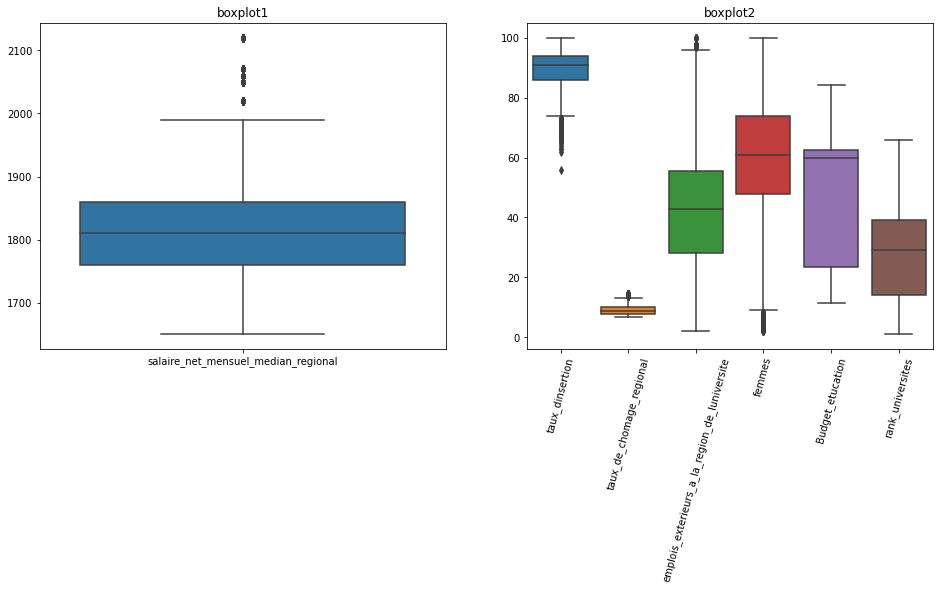

In [163]:
boxplot1=data_taux_dinsersion[['salaire_net_mensuel_median_regional']]
boxplot2=data_taux_dinsersion.drop(['diplome','etablissement','academie','domaine','discipline',
                           'salaire_net_mensuel_median_regional',], axis=1)
plt.figure(figsize=[16,6])
plt.subplot(121)
plt.title('boxplot1')
sns.boxplot(data=boxplot1[4:])

plt.subplot(122)
plt.title('boxplot2')
sns.boxplot(data=boxplot2[4:])
plt.xticks(rotation=75)

plt.show()

D'après ces figures, on peut voir qu'il y a assez peu d'*outliers* que l'on peut donc supprimer sans problème.

In [165]:
for var in [ 'taux_dinsertion', 'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_exterieurs_a_la_region_de_luniversite', 'femmes',
       'Budget_etucation', 'rank_universites']:
    data_taux_dinsersion=drop_outlier(data_taux_dinsersion,var)

### Fuite des cerveaux (`emplois_exterieurs_a_la_region_de_luniversite`)

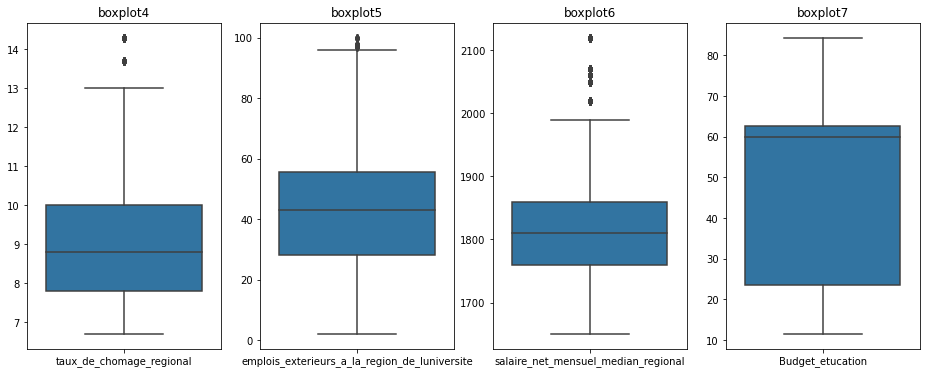

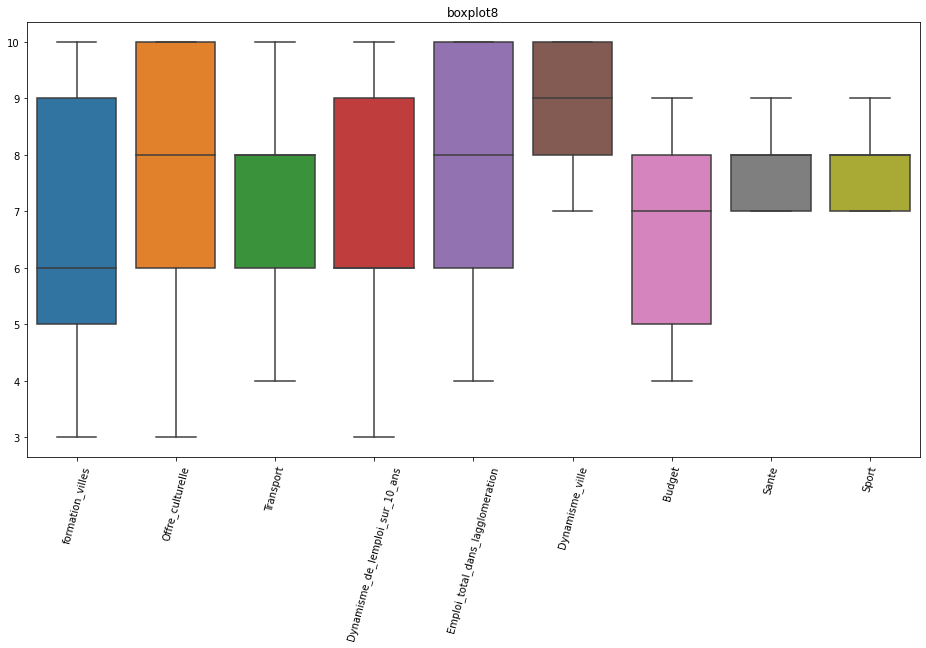

In [166]:
boxplot4=data_emplois_exterieurs[['taux_de_chomage_regional']]
boxplot5=data_emplois_exterieurs[['emplois_exterieurs_a_la_region_de_luniversite']]
boxplot6=data_emplois_exterieurs[['salaire_net_mensuel_median_regional']]
boxplot7=data_emplois_exterieurs[['Budget_etucation']]
boxplot8=data_emplois_exterieurs.drop(['Budget_etucation','academie','taux_de_chomage_regional','emplois_exterieurs_a_la_region_de_luniversite','salaire_net_mensuel_median_regional'], axis=1)


plt.figure(figsize=[16,6])
plt.subplot(141)
plt.title('boxplot4')
sns.boxplot(data=boxplot4[4:])

plt.subplot(142)
plt.title('boxplot5')
sns.boxplot(data=boxplot5[4:])


plt.subplot(143)
plt.title('boxplot6')
sns.boxplot(data=boxplot6[4:])

plt.subplot(144)
plt.title('boxplot7')
sns.boxplot(data=boxplot7[4:])


plt.figure(figsize=[16,8])
plt.title('boxplot8')
sns.boxplot(data=boxplot8[4:])
plt.xticks(rotation=75)

plt.show()

D'après ces figures, on peut voir qu'il y a assez peu d'*outliers* que l'on peut donc supprimer sans problème.

In [167]:
for var in ['taux_de_chomage_regional',
       'salaire_net_mensuel_median_regional',
       'emplois_exterieurs_a_la_region_de_luniversite', 'Budget_etucation',
       'formation_villes', 'Offre_culturelle', 'Transport',
       'Dynamisme_de_lemploi_sur_10_ans', 'Emploi_total_dans_lagglomeration',
       'Dynamisme_ville', 'Budget', 'Sante', 'Sport']:
    data_emplois_exterieurs=drop_outlier(data_emplois_exterieurs,var)

## 3.3 Line Graph

In [168]:
def plot_feature_mean(feature_name,y_label,figsize,ro=90):
    mean=data_master.groupby(feature_name).mean()
    label_list = list(mean.index)
    #print(label_list)
    num_list = list(mean[y_label])

    plt.subplots(figsize=(figsize))
    plt.ylabel(y_label)
    total =  zip(label_list, num_list)
    total = sorted(total, key = lambda x:x[1])
    label_list = []
    num_list = []
    for data in total:
        label_list.append(data[0])
        num_list.append(data[1])
    plt.bar(label_list, num_list)
    plt.xticks(rotation=ro)
    plt.margins(0.08)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

### Taux d'insertion

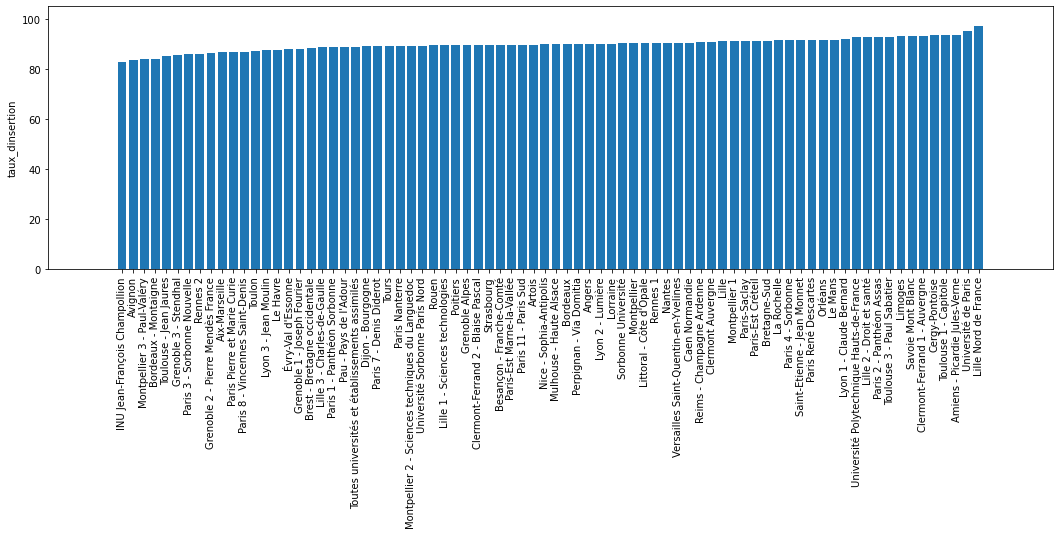

In [169]:
plot_feature_mean('etablissement','taux_dinsertion',(18,5))

On peut voir, ici, que l'universite de Lille a le plus haut taux d'insertion (98%) et que l'INU (institut national universitaire) Champollion en Midi-Pyrénée a le taux d'insertion le plus faible (83%).

### Fuite des cerveaux

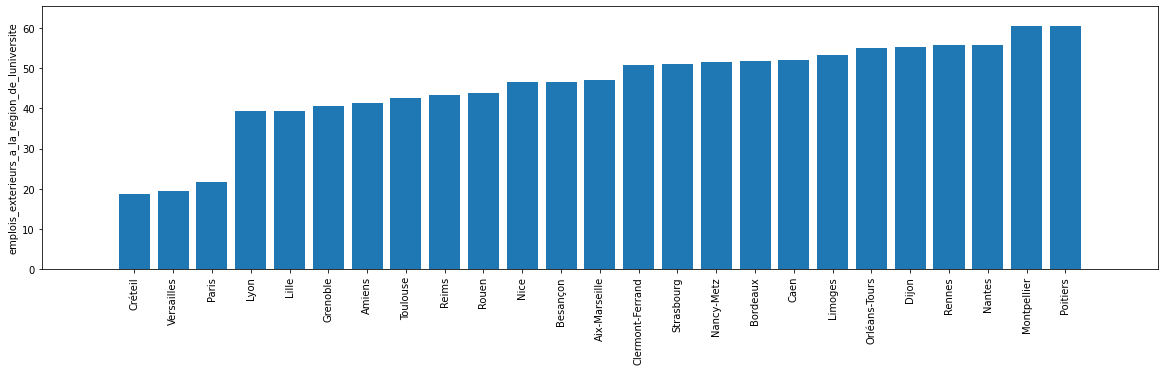

In [170]:
plot_feature_mean('academie','emplois_exterieurs_a_la_region_de_luniversite',(20,5))

D'après ce graph, on peut voir que l'Île-de-France(Créteil, Paris et Versailles) a le taux de fuite de cerveaux le plus faible. Montpellier et Poitiers ont le taux le plus élevé.

## 3.4 Heatmap

### Taux d'insertion

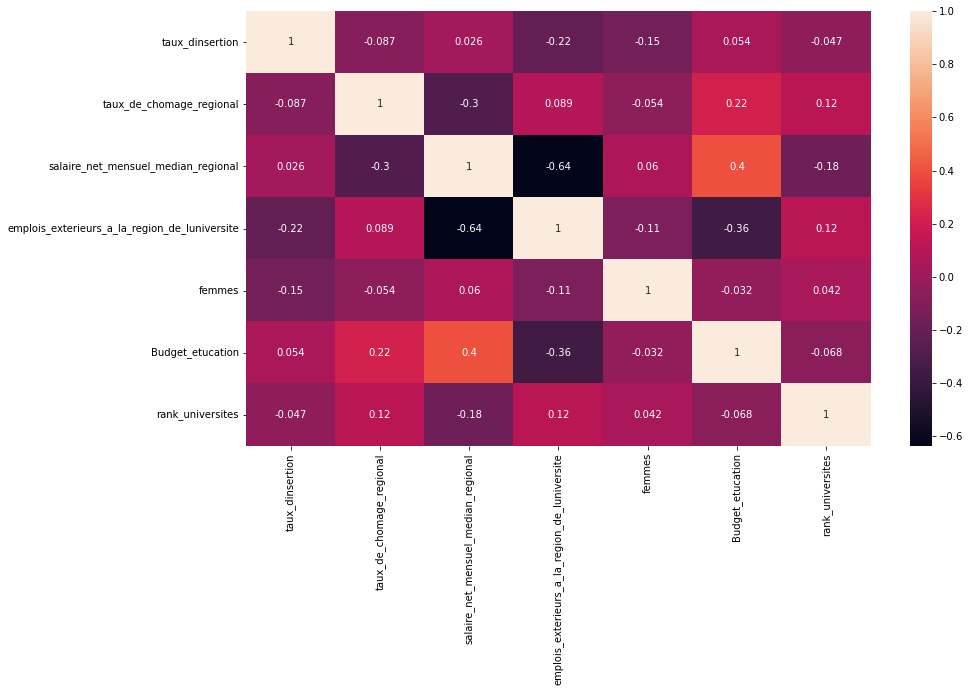

In [171]:
values_df=data_taux_dinsersion.drop(['diplome',
                            'etablissement','academie',
                            'domaine','discipline'], axis=1)

plt.figure(figsize=[14,8])
sns.heatmap(values_df.corr(), annot=True)

In [172]:
corr_taux_dinsertion=(values_df.corr()['taux_dinsertion']).sort_values(ascending=False)
print(corr_taux_dinsertion)

taux_dinsertion                                  1.000000
Budget_etucation                                 0.054418
salaire_net_mensuel_median_regional              0.025566
rank_universites                                -0.047415
taux_de_chomage_regional                        -0.087288
femmes                                          -0.154680
emplois_exterieurs_a_la_region_de_luniversite   -0.219178
Name: taux_dinsertion, dtype: float64


### Fuite des cerveaux

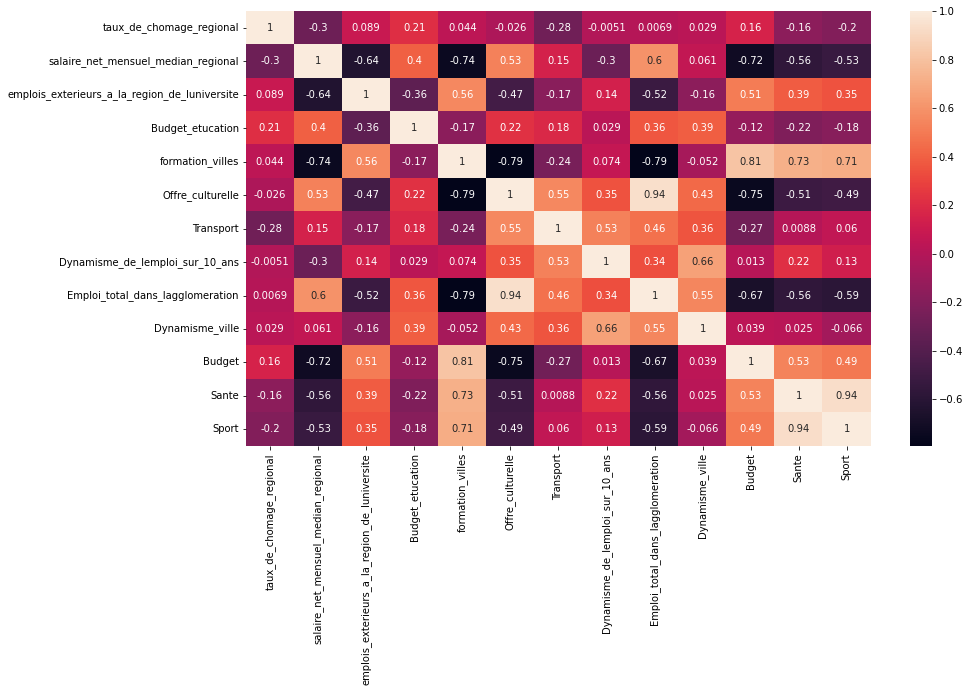

In [173]:
plt.figure(figsize=[14,8])
sns.heatmap(data_emplois_exterieurs.corr(), annot=True)

In [174]:
corr_emplois_exterieurs=(data_emplois_exterieurs.corr()['emplois_exterieurs_a_la_region_de_luniversite']).sort_values(ascending=False)
print(corr_emplois_exterieurs)

emplois_exterieurs_a_la_region_de_luniversite    1.000000
formation_villes                                 0.558059
Budget                                           0.506638
Sante                                            0.385971
Sport                                            0.352186
Dynamisme_de_lemploi_sur_10_ans                  0.142266
taux_de_chomage_regional                         0.089213
Dynamisme_ville                                 -0.158749
Transport                                       -0.173599
Budget_etucation                                -0.357930
Offre_culturelle                                -0.472668
Emploi_total_dans_lagglomeration                -0.518133
salaire_net_mensuel_median_regional             -0.638594
Name: emplois_exterieurs_a_la_region_de_luniversite, dtype: float64


# 4. Modèle de *machine learning*

## 4.1 *Pre-processing*

In [175]:
# the dataframe for analyze taux d'insertion without master ENS
data_taux_dinsersion_sauf_ENS=data_taux_dinsersion.drop(data_taux_dinsersion[(data_taux_dinsersion['diplome']=='Master ENS')].index)

In [176]:
# the dataframe for analyze brain drain without master Ile de france
data_emplois_exterieurs_sauf_idf=data_emplois_exterieurs.drop(data_emplois_exterieurs[(data_emplois_exterieurs['academie']=='Paris')|(data_emplois_exterieurs['academie']=='Versailles')|(data_emplois_exterieurs['academie']=='Créteil')].index)

In [177]:
def feature_coding(feature,feature_name):
    cates=collections.Counter(data_taux_dinsersion[feature]).most_common()
    data_class={}
    for i in range(len(cates)):
        data_class[cates[i][0]]=i
    data_taux_dinsersion[feature_name]=data_taux_dinsersion[feature].map(data_class)

Encodage des chaînes de caractères (`string`).

In [178]:
feature_coding('diplome','diplome_coding')
feature_coding('academie','academie_coding')
feature_coding('etablissement','etablissement_coding')
feature_coding('domaine','domaine_coding')
feature_coding('discipline','discipline_coding')

Division en deux ensembles : apprentissage (*train*) et test.

In [179]:
#for taux_dinsertion
X_td=data_taux_dinsersion.drop(['taux_dinsertion','diplome', 'academie','etablissement','domaine','discipline'],axis=1)
y_td=data_taux_dinsersion['taux_dinsertion']
X_train_td, X_test_td, y_train_td, y_test_td = train_test_split(X_td, y_td, test_size=0.2, random_state=12)

In [180]:
#for taux_dinsertion sauf Master ENS
X_td_sauf_ENS=data_taux_dinsersion_sauf_ENS.drop(['taux_dinsertion','diplome', 'academie','etablissement','domaine','discipline'],axis=1)
y_td_sauf_ENS=data_taux_dinsersion_sauf_ENS['taux_dinsertion']
X_train_td_sauf_ENS, X_test_td_sauf_ENS, y_train_td_sauf_ENS, y_test_td_sauf_ENS = train_test_split(X_td_sauf_ENS, y_td_sauf_ENS, test_size=0.2, random_state=12)

In [181]:
#for emplois_exterieurs_a_la_region_de_luniversite
X_ee=data_emplois_exterieurs.drop(['emplois_exterieurs_a_la_region_de_luniversite','academie'],axis=1)
y_ee=data_emplois_exterieurs['emplois_exterieurs_a_la_region_de_luniversite']
X_train_ee, X_test_ee, y_train_ee, y_test_ee= train_test_split(X_ee, y_ee, test_size=0.2, random_state=12)

In [182]:
#for emplois_exterieurs_a_la_region_de_luniversite sauf ile de France
X_ee_sauf_idf=data_emplois_exterieurs_sauf_idf.drop(['emplois_exterieurs_a_la_region_de_luniversite','academie'],axis=1)
y_ee_sauf_idf=data_emplois_exterieurs_sauf_idf['emplois_exterieurs_a_la_region_de_luniversite']
X_train_ee_sauf_idf, X_test_ee_sauf_idf, y_train_ee_sauf_idf, y_test_ee_sauf_idf = train_test_split(X_ee_sauf_idf, y_ee_sauf_idf, test_size=0.2, random_state=12)

## 4.2 *Random forest*

On utilise un modèle de *random forest* pour analyser l'importance des différents facteurs.

In [183]:
def random_forest(x_train, x_test, y_train, y_test,estimators):
    scaler = StandardScaler()
    scaler.fit(x_train)
    X_train = scaler.transform(x_train)
    X_test = scaler.transform(x_test)
    
    model = RandomForestRegressor(n_jobs=-1)

    # Perform Random Forest Regression with different n° of estimators
    estimators = np.arange(1, estimators, 10)

    test_scores = []
    
    for n in estimators:
        model.set_params(n_estimators=n, random_state=12) #fixing random state for model comparison
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        test_scores.append(r2_score(y_test, y_pred))
    
    # Plot Estimator vs test_scores
    plt.plot(estimators, test_scores)
    plt.xlabel("N° Estimators")
    plt.ylabel("r2_score")
    
    # Plot Feature Importance
    importance=pd.DataFrame(model.feature_importances_, index = x_train.columns, columns = ["importance"]).sort_values("importance", ascending = False)
    importance.nlargest(5,["importance"]).plot(kind='barh')


    print('Random Forest Max Score', max(test_scores), 'achieved using', estimators[np.argmax(test_scores)], 'estimators' )
    
    # Create the mean squared error
    mse = mean_squared_error(y_test, model.predict(X_test))
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    
    
    return model, (max(test_scores)),mse,importance



### Taux d'insertion (`taux_dinsertion`)

Random Forest Max Score 0.34114504175979454 achieved using 111 estimators
The mean squared error (MSE) on test set: 24.2594


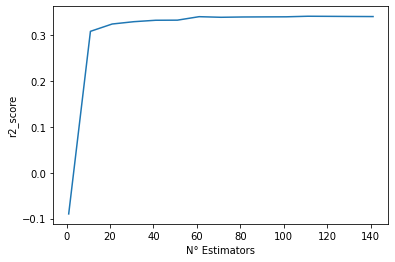

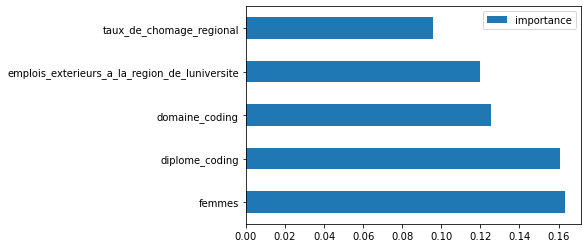

In [184]:
rand_forest_model1, rand_forest_score1,rand_forest_mse1,importance1= random_forest(X_train_td, X_test_td, y_train_td, y_test_td,150)

### Taux d'insertion sauf Master ENS

Random Forest Max Score 0.2507757242889991 achieved using 71 estimators
The mean squared error (MSE) on test set: 27.6617


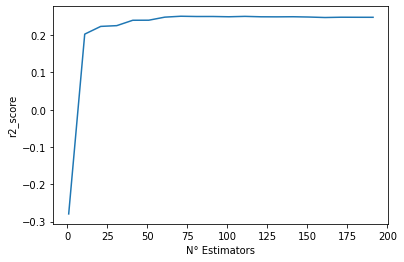

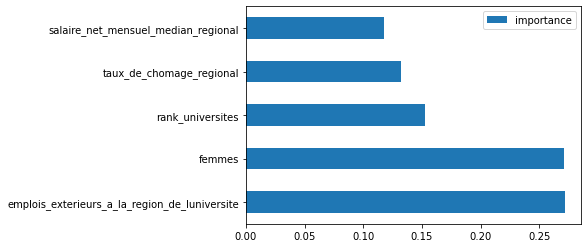

In [185]:
rand_forest_model1_1, rand_forest_score1_1,rand_forest_mse1_1,importance1_1= random_forest(X_train_td_sauf_ENS, X_test_td_sauf_ENS, y_train_td_sauf_ENS, y_test_td_sauf_ENS,200)

### Fuite des cerveaux (`emplois_exterieurs_a_la_region_de_luniversite`)

Random Forest Max Score 0.4721673401059018 achieved using 401 estimators
The mean squared error (MSE) on test set: 173.5469


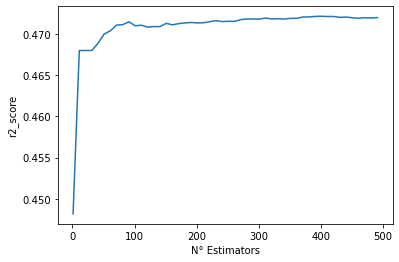

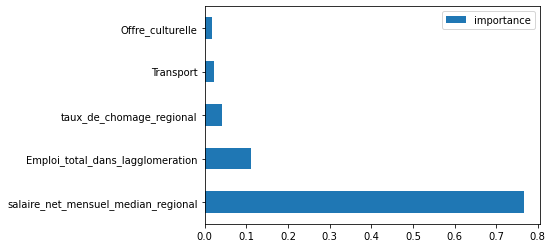

In [186]:
rand_forest_model2, rand_forest_score2,rand_forest_mse2,importance2= random_forest(X_train_ee, X_test_ee, y_train_ee, y_test_ee,500)

Le facteur le plus important est "salaire_net_mensuel_median_regional".

### Fuite des cerveaux sauf île de France

Afin d'étudier les facteurs relatifs à la ville de l'université et trouver des suggestions issues de cette recherche, on applique un *random forest* sans les variables relatives au salaire médian régional..

Random Forest Max Score 0.21219031267707367 achieved using 251 estimators
The mean squared error (MSE) on test set: 179.4152


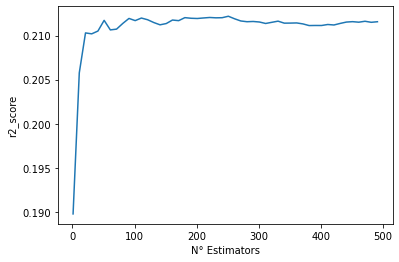

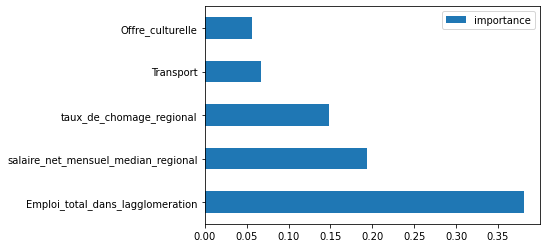

In [187]:
rand_forest_model2_1, rand_forest_score2_1,rand_forest_mse2_1,importance2_1= random_forest(X_train_ee_sauf_idf, X_test_ee_sauf_idf, y_train_ee_sauf_idf, y_test_ee_sauf_idf,500)

## 4.3 Quantification de la qualité des résultats

In [188]:
quality = pd.DataFrame({'taux_dinsertion': [rand_forest_mse1,sqrt(rand_forest_mse1)],\
'taux_dinsertion sauf Master ENS': [rand_forest_mse1_1,sqrt(rand_forest_mse1_1)],\
'emplois_exterieurs_a_la_region_de_luniversite': [rand_forest_mse2,sqrt(rand_forest_mse2)],\
'emplois_exterieurs_a_la_region_de_luniversite sauf île de France': [rand_forest_mse2_1,sqrt(rand_forest_mse2_1)]})

In [189]:
quality.index=['MSE','RMSE']

In [190]:
quality

,taux_dinsertion,taux_dinsertion sauf Master ENS,emplois_exterieurs_a_la_region_de_luniversite,emplois_exterieurs_a_la_region_de_luniversite sauf île de France
MSE,24.259400,27.661665,173.546860,179.415226
RMSE,4.925383,5.259436,13.173719,13.394597


Puisqu'il s'agit d'un problème de régression, nous utilisons la RMSE (l'erreur quadratique moyenne) comme indicateur de la qualité de l'évaluation.

Pour le taux d'insertion, la RMSE est d'environ 5. Cela signifie que la différence moyenne entre la valeur prédite par le modèle et la valeur réelle est de 5%. Nous savions déjà, d'après la partie descriptive des données, que la valeur du taux d'insertion est comprise entre 56 et 100%, ainsi, un écart moyen de plus ou moins 5% n'est pas mauvais.

Pour le taux d'emplois extérieurs à la région de l'université, la RMSE est d'environ 13. Cela signifie que la différence moyenne entre la valeur prédite par le modèle et la valeur réelle est de 13%. Nous savions déjà, d'après la partie descriptive des données, que la valeur du taux d'insertion est comprise entre 2 et 100%, ainsi un écart de 13% n'est pas un très bon résultat mais reste acceptable. Cet écart peut être dû au bruit et aux *outliers*. Mais comme, pour notre projet, nous ne nous focalisons pas sur la prédiction en elle-même mais sur l'importance des facteurs, cette erreur plus élevée n'aura pas un trop gros impact sur nos résultats.

# 5. Analyse des facteurs importants

## 5.1 Taux d'insertion

#### Avec Master ENS

In [191]:
data_features1=importance1.copy(deep=True)
data_features1['correlation']=corr_taux_dinsertion
data_features1.head(5)

,importance,correlation
femmes,0.163209,-0.154680
diplome_coding,0.160861,NaN
domaine_coding,0.125522,NaN
emplois_exterieurs_a_la_region_de_luniversite,0.119668,-0.219178
taux_de_chomage_regional,0.095994,-0.087288


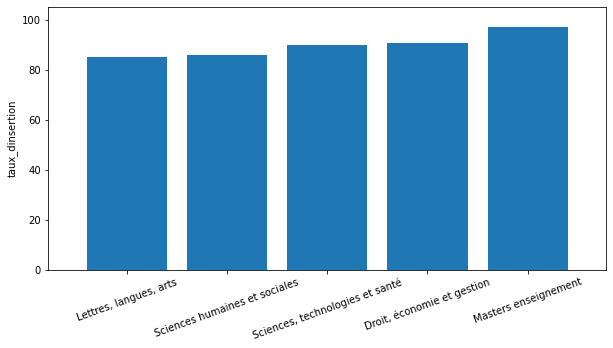

In [192]:
plot_feature_mean('domaine','taux_dinsertion',(10,5),20)

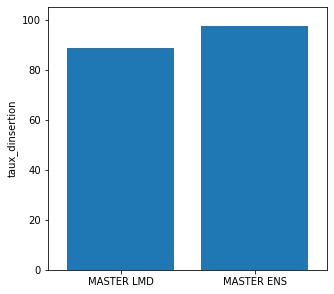

In [193]:
# The taux d'insertion means value for the two type diplome 
plot_feature_mean('diplome','taux_dinsertion',(5,5),0)

#### Sans Master ENS

In [194]:
#without Master ENS
data_features1_1=importance1_1.copy(deep=True)
data_features1_1['correlation']=corr_taux_dinsertion
data_features1_1.head(5)

,importance,correlation
emplois_exterieurs_a_la_region_de_luniversite,0.271761,-0.219178
femmes,0.271454,-0.154680
rank_universites,0.152684,-0.047415
taux_de_chomage_regional,0.131836,-0.087288
salaire_net_mensuel_median_regional,0.117559,0.025566


Ici, on peut voir que le taux d'insertion est corrélé négativement avec le taux de diplômés ayant fuit la région pour travailler. C'est-à-dire que plus les étudiants décident de quitter la région, moins ils auront de chance dde s'insérer professionnellement rapidement (puisque ces études ont été menées entre 18 et 30 mois après obtention du diplôme). La fuite des cerveaux est le facteurs le plus déterminant sur l'insertion professionnelle (~27.2%).

Le second facteur important dans le taux d'insertion est le taux de femmes parmi les diplômés (~27.1%). Ce facteur étant corrélé négativement, plus il y a de femmes dans la promotion, moins les diplômés seront inséré professionnellement à l'issu de leur Master. Lorsque l'on regarde la proportion de femmes dans chaque discipline, celles qui recrutent le plus sont les diciplines scientifiques qui comptent moins de femmes. Cependant, ce n'est pas le nombre de femmes qui influent sur le taux d'insertion - même s'il y a corrélation. Il s'agit, ici, d'un problème sociétale d'insertion des femmes dans les disciplines plus scientifiques. Par ailleurs, il reste toujours une forme de sexisme qui joue sur l'embauche.

Ensuite, on trouve que le classement de l'université joue sur l'insertion professionnelle (avec une importance à hauteur d'environ 15%) et est corrélé négativement (de façon assez faible, environ -4%). Cela signifie que plus le rang de l'université est élevé, moins l'insertion prefessionnelle après le diplôme le sera. En d'autres termes, mieux l'université sera classée, plus les étudiants auront de chances de s'insérer professionnellement à l'issu de leur diplôme. Ainsi, on peut supposer que les employeurs s'intéressent peut-être à ce classement avant de recruter un diplômés puisque ce classement serait gage de qualité.

Enfin, on observe l'importance des facteurs régionaux comme le taux de chômage (environ 13%) et le salaire net mensuel médian (environ 12%). Le premier est logiquement corrélé négativement et le second est logiquement corrélé positivement. Concernant le taux de chômage, il est évident que plus il est élevé, plus il y a de chance qu'il concerne également des postes qui nécessite une formation de Master et donc qu'il ait une influence sur l'linsertion professionnelle. Concernant le salaire en revanche, il s'agit peut-être non pas de l'augmenter globalement, mais de l'augmenter pour les postes qui nécessitent une formation de Master ou tout simplement d'embaucher plus de diplômés de Master (ce qui ferait augmenter le salaire médian.

Par ailleur, on a pu également voir l'influence du type de diplôme (ENS ou LMD) mais qui n'est en réalité que très limitée. En effet, il y a peu de Master ENS (4 écoles en France) et étant une filière prestigieuse difficile d'accès, le taux d'insertion en sortie est forcément plus élevé. L'influence de ce facteur est donc négligeable surtout en sachant qu'aujourd'hui il n'y a plus de distincion et que tous les Master de type LMD (Licence-Master-Doctorat). Par ailleurs, lorsque l'on garde le type de diplôme, on peut voir que le domaine du diplôme a une inlfuence (ce qui montre que ces deux facteurs sont corrélés). Ainsi le domaine n'a d'influence sur le taux d'insertion que lorsque l'on le couple avec le type de dimplôme.

## 5.2 Emplois extérieurs à la région de l'université

#### Avec salaire et île de France

In [195]:
data_features2=importance2.copy(deep=True)
#data_features2=data_features2.drop(['diplome_coding','etablissement_coding','discipline_coding','academie_coding','domaine_coding','situation_coding'])
data_features2['correlation']=corr_emplois_exterieurs
data_features2.head(5)

,importance,correlation
salaire_net_mensuel_median_regional,0.765834,-0.638594
Emploi_total_dans_lagglomeration,0.111324,-0.518133
taux_de_chomage_regional,0.040824,0.089213
Transport,0.021676,-0.173599
Offre_culturelle,0.016888,-0.472668


#### Sans île de France 

In [196]:
data_features2_1=importance2_1.copy(deep=True)
data_features2_1['correlation']=corr_emplois_exterieurs
data_features2_1.head(5)

,importance,correlation
Emploi_total_dans_lagglomeration,0.380489,-0.518133
salaire_net_mensuel_median_regional,0.193148,-0.638594
taux_de_chomage_regional,0.148827,0.089213
Transport,0.066695,-0.173599
Offre_culturelle,0.056413,-0.472668


Après avoir enlevé l'Île de France - qui bénéficie d'un statut particulier étant la capitale - l'importance des facteurs a changé car la plupart des diplômés choisissent de rester en Île de France. Nous analysons les facteurs importants de la fuite des cerveaux dans les autres régions afin d'avoir un modèle plus général.

Le facteur le plus important est le nombre d'emplois dans l'agglomeration qui est corrélé négativement. Cela nous indique que en augmentant le nombre de postes, la région - et plus particulièrement l'agglomération - pourra faire un usage de cette main d'oeuvre et ainsi éviter qu'elle ne quitte la région.

Le salaire est le facteur en terme d'importance et est corrélé négativement avec le taux de fuite des cerveaux. En d'autres termes, plus le niveau de salaire est élevé, moins le taux de fuite des cerveaux sera haut. Ainsi, pour prévenir de cette fuite, augmenter le niveau de salaire moyen de la région est le plus important.

Le troisième facteur important est le taux de chômage régional. C'est évident, le gouvernement ne peut empêcher la fuite des cerveaux que si le problème du chômage est résolu en premier et que des emplois sont disponibles pour les diplômés.

L'importance des transports publics dans la ville est quatrième. Pour les jeunes diplômés, certaines personnes n'ont pas de voiture privée, elles préfèrent donc rester dans des villes avec des transports en commun pratiques. Par conséquent, le développement des transports publics urbains peut réduire la fuite des cerveaux.

L'offre culturelle est également relativement importante, notamment les musées, les bibliothèques, les monuments historiques, les salles de spectacle,les festivals, etc.